### Problem 1 (50 points) 

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary
mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
& + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$

Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$

where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane
system is given below.

|             | $a_1$     | $a_2$      | $a_3$     |
|:------------|:--------|:---------|:--------|
| Water       | 8.07131 | 1730.63  | 233.426 |
| 1,4 dioxane | 7.43155 | 1554.679 | 240.337 |


The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$.

|$x_1$ | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 |
|:-----|:--------|:---------|:--------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
|$p$| 28.1 | 34.4 | 36.7 | 36.9 | 36.8 | 36.7 | 36.5 | 35.4 | 32.9 | 27.7 | 17.5 |

Estimate $A_{12}$ and $A_{21}$ using data from the above table: 

1. Formulate the least square problem; 
2. Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1; 
3. Compare your optimized model with the data. Does your model fit well with the data?




#### Solution 

1.
The given problem can be formulated as a Least Squares problem as follows:

$$
\begin{aligned}
 \underset{A_{12},A_{21}}{\text{minimize: }} \sum_{i=1}^{N=11}(p(x_i;A_{12},A_{21})-p_i)^2
\end{aligned}
$$

<br>
2.

Saturation pressure for water:

$$
\log_{10}(p_{water}^{sat}) = a_1 - \frac{a_2}{T + a_3} = 8.07131 - \frac{1730.63}{20 + 233.426} = 1.24237
$$

<br>
$$
\Rightarrow p_{water}^{sat} = 17.47325
$$


Saturation pressure for 1,4dioxane:

$$
\log_{10}(p_{1,4dioxane}^{sat}) = a_1 - \frac{a_2}{T + a_3} = 7.43155 - \frac{1554.679}{20 + 240.337} = 1.45975
$$

<br> 	
$$
\Rightarrow p_{water}^{sat} = 28.82409
$$

<br>
With $x_2=1-x_1$, the equilibrium relation becomes:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}(1-x_1)}{A_{12}x_1+A_{21}(1-x_1)}\right)^2\right)p_{water}^{sat}\\
& + (1-x_1)\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}(1-x_1)}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$


Iteration: 0, Loss: 390.43841552734375 
Iteration: 10, Loss: 0.8190786242485046 
Iteration: 20, Loss: 0.6862062811851501 
Iteration: 30, Loss: 0.6719443798065186 
Iteration: 40, Loss: 0.6703857183456421 
Iteration: 50, Loss: 0.6702117919921875 
Iteration: 60, Loss: 0.6701946258544922 

Number of iterations: 67
Final loss value: 0.6701934933662415
Final error: 0.0
The solution is: A = [1.9583441 1.6892473]



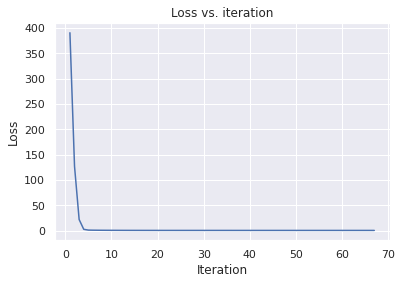

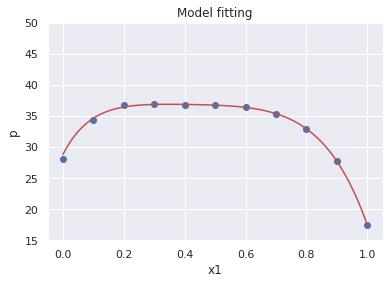

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import seaborn as sns


def saturation_pressure(T, a1, a2, a3):
    """Compute the saturation pressure."""

    log_p = a1 - (a2/(T + a3))
    p = 10**log_p
    return p


def gradient_descent(x1, p, water_sat_p, dioxane_sat_p, a, eps, max_iter):
    """
    Gradient Descent algorithm.
    
    Inputs:
      - x1(torch.FloatTensor): Input data
      - p(torch.FloatTensor):  Output data
      - water_sat_p(float):    Water saturation pressure
      - dioxane_sat_p(float):  1,4dioxane saturation pressure
      - a(float):              Learning rate
      - eps(float):            Tolerance
      - max_iter(int):         Maximum iterations before halting
    Returns:
      - A(torch.Tensor):       The model parameters (A12,A21)
      - loss_history(list):    Loss values at each iteration
    """

    # Initialize weights
    # A = torch.randn(2, requires_grad=True, device=device, dtype=torch.float)  # Randomly initialize weights
    A = torch.tensor([1, 1], requires_grad=True, device=device, dtype=torch.float) 
    
    loss_history = [float('inf')]  # The loss values history
    error = float('inf')           # Initialize error 
    iter = 0                       # Current iteration

    while error > eps and iter < max_iter:

        # Compute p prediction (Forward pass)
        p_pred = x1*torch.exp(A[0]*(A[1]*(1-x1)/(A[0]*x1+A[1]*(1-x1)))**2)*water_sat_p + \
                (1-x1)*torch.exp(A[1]*(A[0]*x1/(A[0]*x1+A[1]*(1-x1)))**2)*dioxane_sat_p
        
        # Compute loss
        loss = (p_pred - p).pow(2).sum()

        # Print loss every 10 iterations
        if iter % 10 == 0:
            print('Iteration: {}, Loss: {} '.format(iter, loss.item()))
        
        # Compute gradient of the loss wrt all the learnable parameters of the model
        loss.backward()

        # Current error 
        # error = torch.linalg.norm(A)       # gradient magnitude
        error =  abs(loss-loss_history[-1])  # difference in consecutive loss values


        # Update the weights using Gradient Descent
        with torch.no_grad():  # We don't need the GD algorithm itself to be differentiable wrt A
            A -= a * A.grad
        
            # Clear the gradients (so they don't accumulate)
            A.grad.zero_()
        
        
        iter += 1
        loss_history.append(loss)            # Save loss values
    
    print('\nNumber of iterations: {}'.format(iter))
    print('Final loss value: {}'.format(loss.data.numpy()))
    print('Final error: {}'.format(error))

    return A.data, loss_history


def plot_loss_history(loss_history):
    """
    Plot loss vs. iteration

    Inputs:
      - loss_history(list): Loss values at each iteration
    """

    sns.set_theme()
    plt.figure()
    plt.plot(loss_history)   
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss vs. iteration')
    plt.show()
    return

def plot_model_fit(A, x1, p, water_sat_p, dioxane_sat_p):
    """
    Plot the datapoints along with the fitted model.
    """

    # Generate points and predictions to create curve
    x = torch.linspace(0.0, 1.0)
    p_pred = x*torch.exp(A[0]*(A[1]*(1-x)/(A[0]*x+A[1]*(1-x)))**2)*water_sat_p + \
            (1-x)*torch.exp(A[1]*(A[0]*x/(A[0]*x+A[1]*(1-x)))**2)*dioxane_sat_p

    sns.set_theme()
    plt.figure()
    plt.scatter(x1, p, label='Data')
    plt.plot(x.detach().numpy(), p_pred.detach().numpy(),'r', label='Model')
    plt.xlabel('x1')
    plt.ylabel('p')
    plt.title('Model fitting')
    plt.ylim([15, 50])
    plt.show()


if __name__ == '__main__':

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Parameters
    # --------------------------------------------------------------------------
    eps = 1e-9                       # Tolerance (termination criterion)
    max_iter = 10000                 # Maximum iterations before halting

    # Compute saturation pressures
    # --------------------------------------------------------------------------
    water_sat_p = saturation_pressure(T=20, a1=8.07131, a2=1730.63, a3=233.426)
    dioxane_sat_p = saturation_pressure(T=20, a1=7.43155, a2=1554.679, a3=240.337)

    # Solve Least Squares problem with Gradient Descent
    # --------------------------------------------------------------------------
    # Input data
    x1 = torch.tensor([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], device=device, dtype=torch.float)
    # Output data
    p = torch.tensor([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5], device=device, dtype=torch.float)

    # Fit model using Gradient Descent
    A, loss_history = gradient_descent(x1, p, water_sat_p, dioxane_sat_p, 0.001, eps, max_iter)

    print('The solution is: A = {}\n'.format(A.data.numpy()))

    # Plots
    # --------------------------------------------------------------------------
    # Plot loss vs. iteration
    plot_loss_history(loss_history)

    # Plot the data and fitted model
    plot_model_fit(A, x1, p, water_sat_p, dioxane_sat_p)


    


    

    




---
### Problem 2 (50 points) 

Solve the following problem using Bayesian Optimization:
$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$
for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$. A tutorial on Bayesian Optimization can be found [here](https://thuijskens.github.io/2016/12/29/bayesian-optimisation/).



#### Solution 

